In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point,Polygon
%matplotlib inline

In [55]:
df = pd.read_csv('Datos Casas.csv',sep=';')

In [56]:
df.head()

,Precio,Habitaciones,Banos,m2
0,107000,1,1,45
1,125000,1,1,40
2,113000,1,1,42
3,100000,1,1,40
4,90000,1,1,32


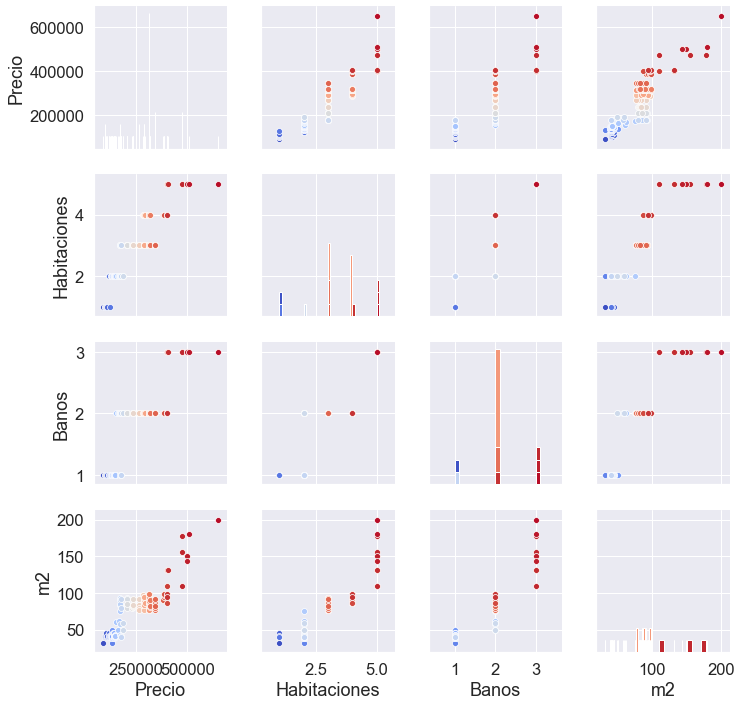

In [57]:
g = sns.pairplot(df,hue='Precio',diag_kind='hist',palette='coolwarm')
g._legend.remove()

In [58]:
precios = df['Precio']
features = df.drop('Precio',axis=1)
print("Tenemos {} puntos con {} variables cada uno.".format(*df.shape))

Tenemos 140 puntos con 4 variables cada uno.


In [59]:
# Minimum price of the data
minimum_price = np.amin(precios)

# Maximum price of the data
maximum_price = np.amax(precios)

# Mean price of the data
mean_price = np.mean(precios).round(0)

# Median price of the data
median_price = np.median(precios).round(0)

# Standard deviation of prices of the data
std_price = np.std(precios).round(0)

# Show the calculated statistics
print("Estadística de nuestros datos:\n")
print("Precio mínimo: {}€".format(minimum_price)) 
print("Precio máximo: {}€".format(maximum_price))
print("Precio medio: {}€".format(mean_price))
print("Mediana: {}€".format(median_price))
print("Desviación estándar: {}€".format(std_price))

Estadística de nuestros datos:

Precio mínimo: 90000€
Precio máximo: 649382€
Precio medio: 250480.0€
Mediana: 267016.0€
Desviación estándar: 106977.0€


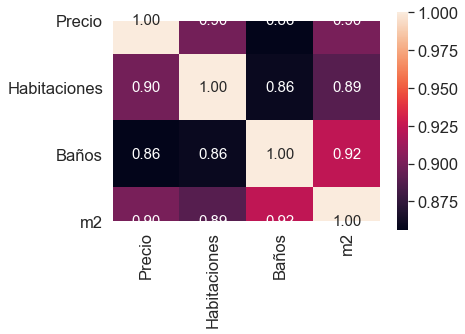

In [60]:
# Calculate and show correlation matrix
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=('Precio','Habitaciones','Baños','m2'),
                xticklabels=('Precio','Habitaciones','Baños','m2'))

In [61]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [62]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, precios, test_size=0.2, random_state = 42)

In [63]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [64]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


In [65]:
# Produce a matrix for client data
client_data = [10000,2,2], # Client 1


# Show predictions
reg.predict(client_data)

array([325341.81818182])

In [66]:
#Medimos un estadístico (Mean Square Error) para ver lo robusto que es nuestro modelo

In [67]:
from sklearn.metrics import mean_squared_error
predicciones = reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predicciones)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

38170.93376925072

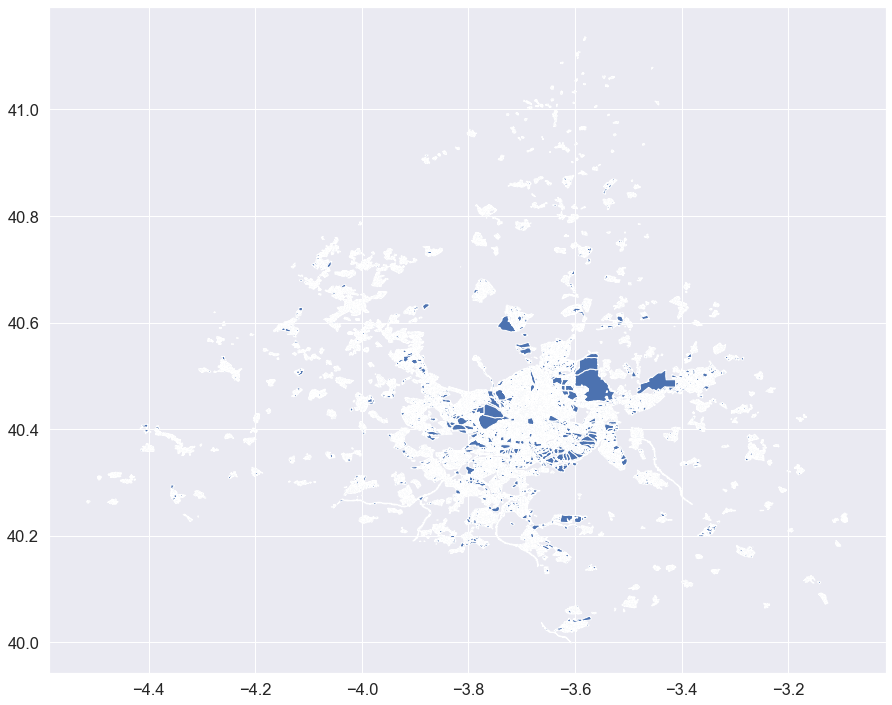

In [68]:
street_map = gpd.read_file('MANZANA.shp')
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax =ax)

In [69]:
# Python code to generate 
# random numbers and 
# append them to a list 
import random 
  
# Function to generate 
# and append them  
# start = starting range, 
# end = ending range 
# num = number of  
# elements needs to be appended 
def Rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.uniform(start, end))
  
    return res 
  
# Driver Code 
num = 140
start = 40.41
end = 40.43
latitud = Rand(start, end, num)
num = 140
start = -3.55
end = -3.57
longitud = Rand(start,end,num)

In [70]:
df['latitud'] = latitud
df['longitud'] = longitud

In [71]:
crs = {'init':'epsg:4326'}
df.head()

,Precio,Habitaciones,Banos,m2,latitud,longitud
0,107000,1,1,45,40.412566,-3.557512
1,125000,1,1,40,40.424717,-3.551870
2,113000,1,1,42,40.426489,-3.560514
3,100000,1,1,40,40.418607,-3.559071
4,90000,1,1,32,40.413485,-3.566792


In [72]:
geometry = [Point(xy) for xy in zip(df['longitud'],df['latitud'])]
geometry[:3]

In [73]:
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

,Precio,Habitaciones,Banos,m2,latitud,longitud,geometry
0,107000,1,1,45,40.412566,-3.557512,POINT (-3.557512119032819 40.41256612178011)
1,125000,1,1,40,40.424717,-3.551870,POINT (-3.551869986581708 40.42471746577004)
2,113000,1,1,42,40.426489,-3.560514,POINT (-3.560513947506474 40.42648943943399)
3,100000,1,1,40,40.418607,-3.559071,POINT (-3.55907135242253 40.41860660610889)
4,90000,1,1,32,40.413485,-3.566792,POINT (-3.566791895262395 40.41348526432436)


In [74]:
#fig,ax=plt.subplots(figsize=(15,15))
#street_map.plot(ax = ax, alpha=0.5 , color='grey')
#geo_df[geo_df['Precio'] == 0].plot(ax = ax, markersize = 20, color='blue', marker = 'o', label='Precio')
#plt.legend(prop={'size': 15})

In [75]:
from bokeh.plotting import figure, save, show

In [76]:
def getPointsCoords(row,geom,coord_type):
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [77]:
geo_df['x']=geo_df.apply(getPointsCoords , geom='geometry', coord_type = 'x' , axis=1)
geo_df['y']=geo_df.apply(getPointsCoords , geom='geometry', coord_type = 'y' , axis=1)

In [78]:
geo_df.head()

,Precio,Habitaciones,Banos,m2,latitud,longitud,geometry,x,y
0,107000,1,1,45,40.412566,-3.557512,POINT (-3.557512119032819 40.41256612178011),-3.557512,40.412566
1,125000,1,1,40,40.424717,-3.551870,POINT (-3.551869986581708 40.42471746577004),-3.551870,40.424717
2,113000,1,1,42,40.426489,-3.560514,POINT (-3.560513947506474 40.42648943943399),-3.560514,40.426489
3,100000,1,1,40,40.418607,-3.559071,POINT (-3.55907135242253 40.41860660610889),-3.559071,40.418607
4,90000,1,1,32,40.413485,-3.566792,POINT (-3.566791895262395 40.41348526432436),-3.566792,40.413485


In [79]:
p_df = geo_df.drop('geometry',axis=1)

In [80]:
from bokeh.models import ColumnDataSource

psource = ColumnDataSource(p_df)

In [81]:
p = figure(title='Prueba')
p.circle('x','y', source = psource , color='red', size=10)

GlyphRenderer(id='1195', ...)

In [82]:
from bokeh.io import output_notebook

In [83]:
output_notebook()

Loading BokehJS ...

In [84]:
show(p)

In [85]:
from bokeh.models import HoverTool

In [86]:
my_hover = HoverTool()

In [87]:
my_hover.tooltips = [('Precio del piso (€)', '@Precio'),('Número de habitaciones', '@Habitaciones'),('Número de baños', '@Baños')]

In [88]:
p.add_tools(my_hover)
show(p)

In [89]:
import ctypes
from ctypes.util import find_library
import pysal as ps

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [90]:
grid = gpd.read_file('MANZANA.shp')

In [91]:
CRS = grid.crs
print(CRS)

{'init': 'epsg:4258'}


In [92]:
geo_df['geometry'] = geo_df['geometry'].to_crs(crs=CRS)

In [93]:
def getPolyCoords(row, geom, coord_type):
    
    '''Returns the coordinates(x,y) of edges of a Polygon exterior'''
    
    exterior=row[geom].exterior
    
    if coord_type == 'x':
        return list(exterior.coords.xy[0])     # Coordenadas x del exterior
    
    elif coord_type == 'y':
        return list(exterior.coords.xy[1])

In [94]:
grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

geo_df['x'] = geo_df.apply(getPointsCoords, geom='geometry', coord_type='x', axis=1)
geo_df['y'] = geo_df.apply(getPointsCoords, geom='geometry', coord_type='y', axis=1)

In [95]:
grid[['x','y']].head(2)

,x,y
0,"[-3.6274116153170644, -3.6274351642455773, -3....","[41.0868416200976, 41.08689239218068, 41.08690..."
1,"[-3.626901257911721, -3.6269038350862015, -3.6...","[41.0870156040926, 41.08702369729607, 41.08715..."


In [96]:
g_df = grid.drop('geometry', axis=1).copy()
geo2_df = geo_df.drop('geometry', axis=1).copy()

In [97]:
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

color_mapper = LogColorMapper(palette=palette)

In [ ]:
p = figure(title= 'Viviendas vendidas Coslada')

p.patches('x','y', source=g_df,
         fill_alpha=1.0,line_color= 'black', line_width=0.05)

p.circle('x','y',size=3,source=geo2_df,color='black')

show(p)